# Expression Data Analysis

In this notebook we are going to perform daat analysis on the expression of genes during heat stressn in Arabidopsis thaliana first, because it is a model plant and then do the same for different plant species during heat stress. The goal of this analysis is to identify if there is any similar pattern of gene expression across plant species during heat stress.

### Load the file

Let's first load our dataset

In [ ]:
import pandas as pd

df = pd.read_excel('/content/arabidopsis data only.xlsx')

df.head()

,Gene Name,Transcription Factor (TF) Involved,type of regulation,Species,Stress Conditions,Expression Data,Source/Reference
0,RCF2,NAC019,upregulated,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Required for activation of HSFs and HSPs,"RT-PCR, ChIP-qPCR​(09)"
1,HSFA1b,NAC019,upregulated,Arabidopsis thaliana,Heat stress (37°C),Reduced expression in nac019 mutants,"RT-PCR, EMSA​(09)"
2,HSP70B,Not specified,upregulated,Arabidopsis thaliana,"Heat stress (37°C, 1h)",Reduced accumulation in nac019 mutants,"RT-PCR, Figure 3​(09)"
3,HSFA6b,NAC019,upregulated,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Binds to NAC recognition sequence in promoters,"EMSA, ChIP-qPCR​(09)"
4,HSFC1,NAC019,upregulated,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Reduced expression in nac019 and rcf2-1 mutants,"RT-PCR, EMSA​(09)"


We can see the head of our file and the column names

#Now that we have uploaded the data set for A.Thaliana , we will analyse the gene expression during heat stress as follows:


*   Standardize Expression Data: "Expression Data" column contains textual descriptions instead of numerical values. We need to extract meaningful quantitative values if available.
*   Pattern Analysis: We can group by stress conditions and regulation type to identify common patterns in gene expression.

*   Transcription Factor Influence: Determine which TFs are most commonly associated with heat stress response.





In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/arabidopsis data only.xlsx')

In [ ]:
df.head()

,Gene Name,Transcription Factor (TF) Involved,type of regulation,Species,Stress Conditions,Expression Data,Source/Reference
0,RCF2,NAC019,upregulated,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Required for activation of HSFs and HSPs,"RT-PCR, ChIP-qPCR​(09)"
1,HSFA1b,NAC019,upregulated,Arabidopsis thaliana,Heat stress (37°C),Reduced expression in nac019 mutants,"RT-PCR, EMSA​(09)"
2,HSP70B,Not specified,upregulated,Arabidopsis thaliana,"Heat stress (37°C, 1h)",Reduced accumulation in nac019 mutants,"RT-PCR, Figure 3​(09)"
3,HSFA6b,NAC019,upregulated,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Binds to NAC recognition sequence in promoters,"EMSA, ChIP-qPCR​(09)"
4,HSFC1,NAC019,upregulated,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Reduced expression in nac019 and rcf2-1 mutants,"RT-PCR, EMSA​(09)"


In [ ]:
print(df.columns) #we will see if all the columns are there or not

Index(['Gene Name', 'Transcription Factor (TF) Involved',
       'type of regulation ', 'Species', 'Stress Conditions',
       'Expression Data', 'Source/Reference'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()  # we will Remove extra spaces


In [ ]:
print(df["type of regulation"].unique()) #we will ensure what type of regulation is there in the columns type of regulation


[1]


#Now to asign the value 1 to upregulayted we will use



*   a) lambda x:
Defines an anonymous function that takes x (a single value from the column).
*   b) 1 if "upregulated" in x else 0
Checks if "upregulated" appears in x:
If x contains "upregulated", return 1.
Otherwise, return 0.

In [ ]:
# map "unpregulated" to 1, everything else will remain 0
df["type of regulation"] = df["type of regulation"].map(lambda x: 1 if "upregulated" in x else 0)


TypeError: argument of type 'int' is not iterable

In [ ]:
df.head()

In [ ]:
df

#Here we are giving mathematical values to the regulation for quantitative analysis and plotting it easily.


now for the next step we will differentiate the data with the different stress conidtions. since our data is about heat stress, we will see how long the stress was there or at what temperature certain genes functioned.

This helps us see if certain heat stress conditions (e.g., 37°C, 1h vs. 37°C, 7d) have a stronger effect on gene regulation.

In [ ]:
#Step 3: Grouping by Stress Conditions

To group the data accordingly we will now use matlab to make the plot.




In [ ]:
#count the number of unregulated and downregulated genes for each stress condition
regulation_by_stress = df.groupby(["Stress Conditions"]) ["type of regulation"].value_counts().unstack()

Here df.groupby (stress condition) is done to group the data in a column. every unique conidtion i.e 37,7d,1h is treated as different groups.

value_counts() is used to count how many times 1 and -1 appears. 1 is unregualted and -1 is downregulated.

unstack() makes a table of the given data. where it makes   an index etc.

In [ ]:
#Display the grouped data
import matplotlib.pyplot as plt

we are importing matlab here because we dont want to install it seperating. so we are using it with python.  

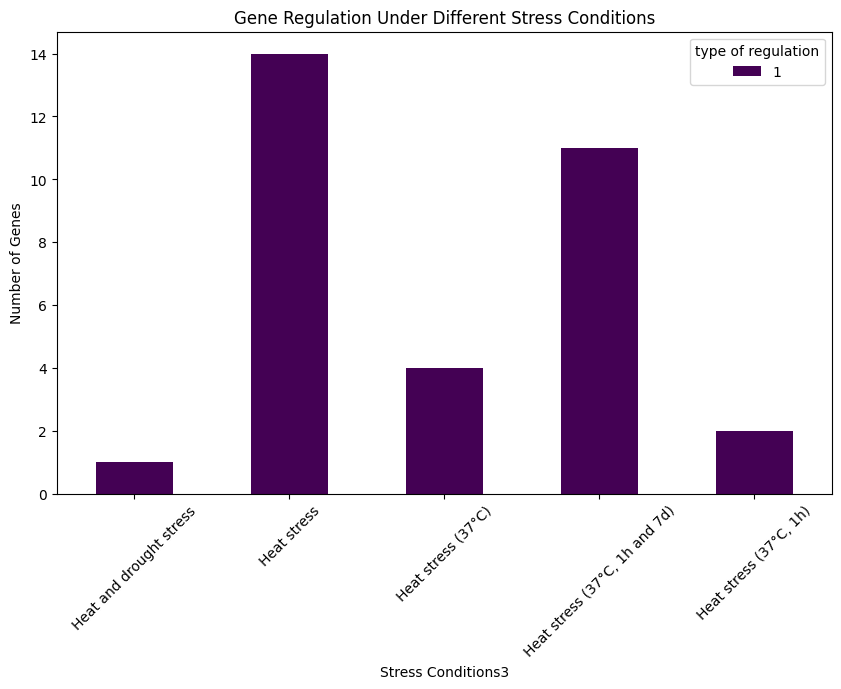

In [ ]:
#plot a bar chart
regulation_by_stress.plot(kind="bar",stacked=True,figsize=(10,6), colormap ="viridis")
plt.title("Gene Regulation Under Different Stress Conditions")
plt.xlabel("Stress Conditions3")
plt.ylabel("Number of Genes")
plt.xticks(rotation=45)
plt.show()

#Here


*   **regulation_by_stress.plot** = to make a graph
*   **kind="bar"** = to tell what kind of graph
*   **stacked=True** = to stack the value on top of similar values
*   **figsize=(10,6)** = width and length
*   **colormap ="viridis"** = colour
*   **plt.title("Gene Regulation Under Different Stress Conditions")** = title in matlib
*   **plt.xlabel("Stress Conditions3")** = x axis
*   **plt.ylabel("Number of Genes")** =y axis
*   **plt.xticks(rotation=45)** = x axis text is tilted at 45
*  **plt.show()** = show the bar graph


now we will do deep analysis for further understanding.
we will study the transcription factors involed.

1. Analyze Transcription Factor (TF) Influence (analyze which TFs are most frequently involved in the heat stress response.) i.e Count occurrences of each transcription factor

2. Co-Expression Analysis : to check if certain genes co-express (respond similarly under stress), we can use clustering or heatmaps.



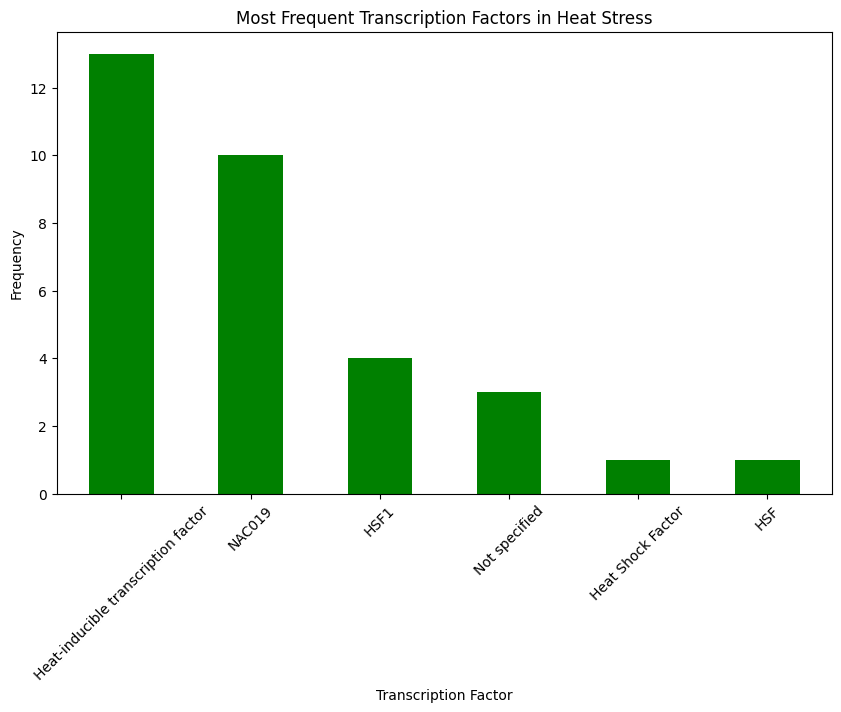

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each transcription factor
tf_counts = df["Transcription Factor (TF) Involved"].value_counts()

# Display the top 10 most frequent transcription factors
tf_counts.head(10).plot(kind="bar", figsize=(10,6), color="green")
plt.title("Most Frequent Transcription Factors in Heat Stress")
plt.xlabel("Transcription Factor")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


#Co-Expression Analysis: Checking If Certain Genes Co-Express**

Step 1: Create a heatmap to visualize how genes respond to stress conditions.

Step 2: Use correlation analysis to see which genes behave similarly.

#why we are doing this?**

1. Genes clustered together exhibit similar expression behavior across stress conditions.

2. If two genes always behave the same way under different conditions, they might be co-expressed.

#What is a Heatmap?**
A heatmap is a graphical representation of data where individual values are represented by colors instead of numbers. In gene expression analysis, a heatmap helps visualize how different genes respond to stress conditions.

#Why Use a Heatmap in Gene Expression Analysis?**
1. Easily spot patterns → See which genes are co-expressed (regulated together).
2. Identify gene clusters → Groups of genes with similar responses to heat stress.
3. Compare stress conditions → Find out which conditions trigger similar gene expression changes.

**Import seaborn as sns**

In [ ]:
import seaborn as sns

**Import matplotlib as ply**

In [ ]:
import matplotlib.pyplot as plt

**Create a matrix beacuse in seaborn it needs matrix to prepare the visual map**

In [ ]:
## Convert DataFrame to a matrix where rows are genes and columns are stress conditions

expression_matrix = df.pivot_table(index="Gene Name", columns="Stress Conditions", values="type of regulation")


In [ ]:
df

,Gene Name,Transcription Factor (TF) Involved,type of regulation,Species,Stress Conditions,Expression Data,Source/Reference
0,RCF2,NAC019,1,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Required for activation of HSFs and HSPs,"RT-PCR, ChIP-qPCR​(09)"
1,HSFA1b,NAC019,1,Arabidopsis thaliana,Heat stress (37°C),Reduced expression in nac019 mutants,"RT-PCR, EMSA​(09)"
2,HSP70B,Not specified,1,Arabidopsis thaliana,"Heat stress (37°C, 1h)",Reduced accumulation in nac019 mutants,"RT-PCR, Figure 3​(09)"
3,HSFA6b,NAC019,1,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Binds to NAC recognition sequence in promoters,"EMSA, ChIP-qPCR​(09)"
4,HSFC1,NAC019,1,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Reduced expression in nac019 and rcf2-1 mutants,"RT-PCR, EMSA​(09)"
5,HSP101,NAC019,1,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Accumulation restored by NAC019 overexpression,"RT-PCR, Figure 6​(09)"
6,HSP70,HSF1,1,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)",Required for thermotolerance and chaperone act...,"RT-PCR, ChIP-qPCR​(08)"
7,HSP90,HSF1,1,Arabidopsis thaliana,"Heat stress (37°C, 1h and 7d)","Molecular chaperone, protects proteins under h...","Western blot, EMSA​(08)"
8,HSP101,HSF1,1,Arabidopsis thaliana,Heat stress (37°C),"Enhances thermotolerance, interacts with HSF",Gene knockout studies​(08)
9,HSF1,Not specified,1,Arabidopsis thaliana,Heat stress (37°C),Key transcriptional regulator of heat shock pr...,"ChIP-qPCR, EMSA​(08)"


<Axes: xlabel='Stress Conditions', ylabel='Gene Name'>

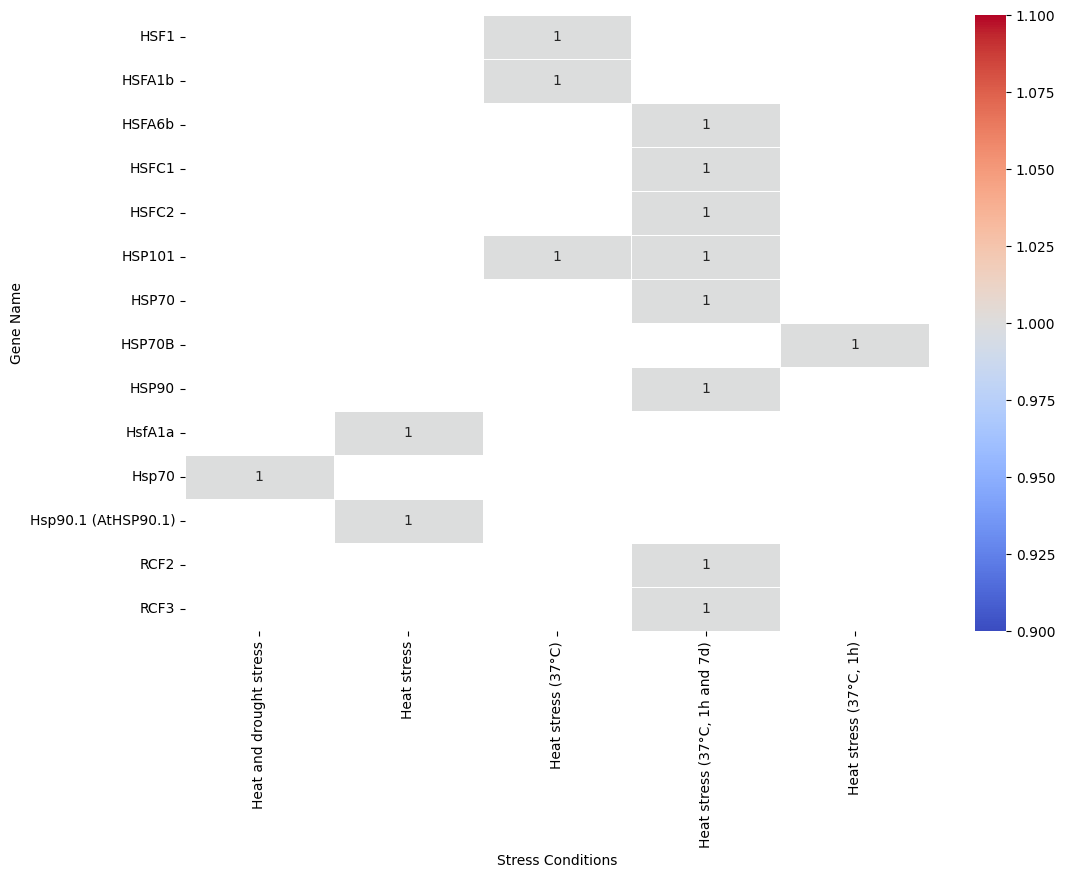

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(expression_matrix, cmap="coolwarm", annot=True, linewidths=0.5)

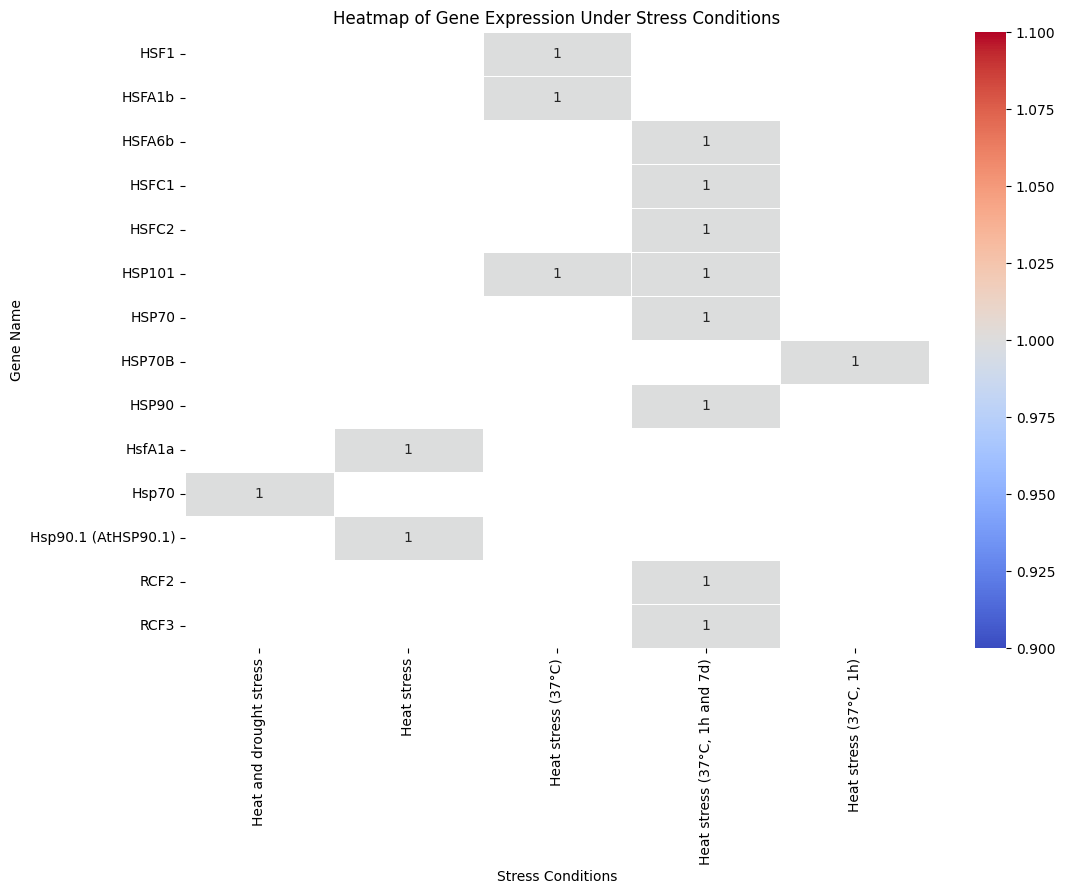

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(expression_matrix, cmap="coolwarm", annot=True, linewidths=0.5)

# Labels
plt.title("Heatmap of Gene Expression Under Stress Conditions")
plt.xlabel("Stress Conditions")
plt.ylabel("Gene Name")

# Show plot
plt.show()

now here in this heatmap all the vlaues are upregulated. fo upregulated the colour is red but even though all are upregulated some of the genes are going into the blue zone which isnt true. so we will fix this by forcing keeping the baseline as 1

to do that we wil use

1. Uses cmap="Reds" to ensure everything is in shades of red (no more blue).

2. vmin=1, vmax=1 forces Matplotlib to treat all values as the same, removing artificial color scaling.

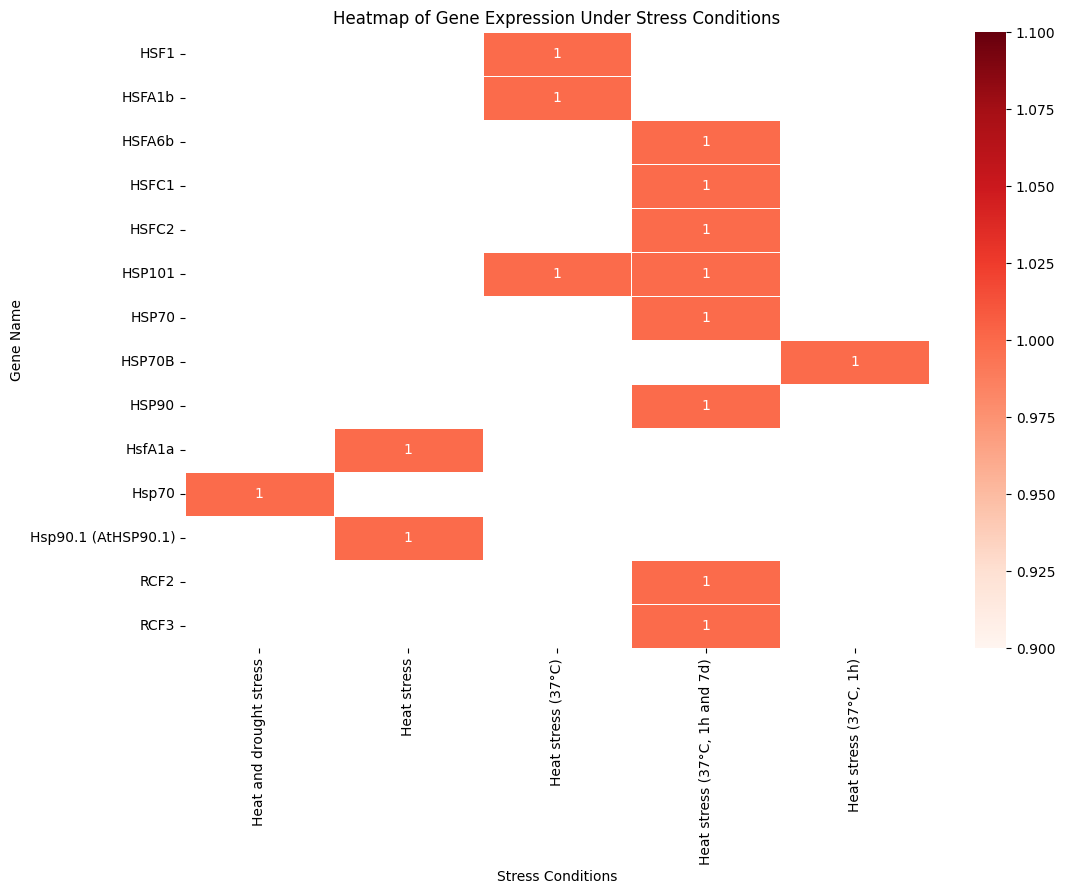

In [ ]:

# Convert DataFrame to a matrix where rows are genes and columns are stress conditions
expression_matrix = df.pivot_table(index="Gene Name", columns="Stress Conditions", values="type of regulation")

# Set manual color scale limits (force everything to appear in the same color range)
plt.figure(figsize=(12, 8))
sns.heatmap(expression_matrix, cmap="Reds", annot=True, linewidths=0.5, vmin=1, vmax=1)

# Labels
plt.title("Heatmap of Gene Expression Under Stress Conditions")
plt.xlabel("Stress Conditions")
plt.ylabel("Gene Name")

# Show plot
plt.show()


#Explaining the code

import seaborn as sns import matplotlib.pyplot as plt import numpy as np

numpy is used to handle large mathematical arrays.

expression_matrix = df.pivot_table(index="Gene Name", columns="Stress Conditions", values="type of regulation")

This converts the DataFrame into a pivot table (a matrix), where: Rows → Genes (Gene Name). Columns → Stress conditions (Stress Conditions). Values → Type of regulation (1 for upregulated).

cmap is colour of the map

vmin is the lowest value vmax is the highest value

here we are keep vmin 1 because if we go down it will show downregulation as downregulation is -1.

vmax is kept 1.1 slightly above 1 to show all are upregulated

annot=True → Displays numbers inside the heatmap cells

cbar=True → Keeps the color bar (legend).

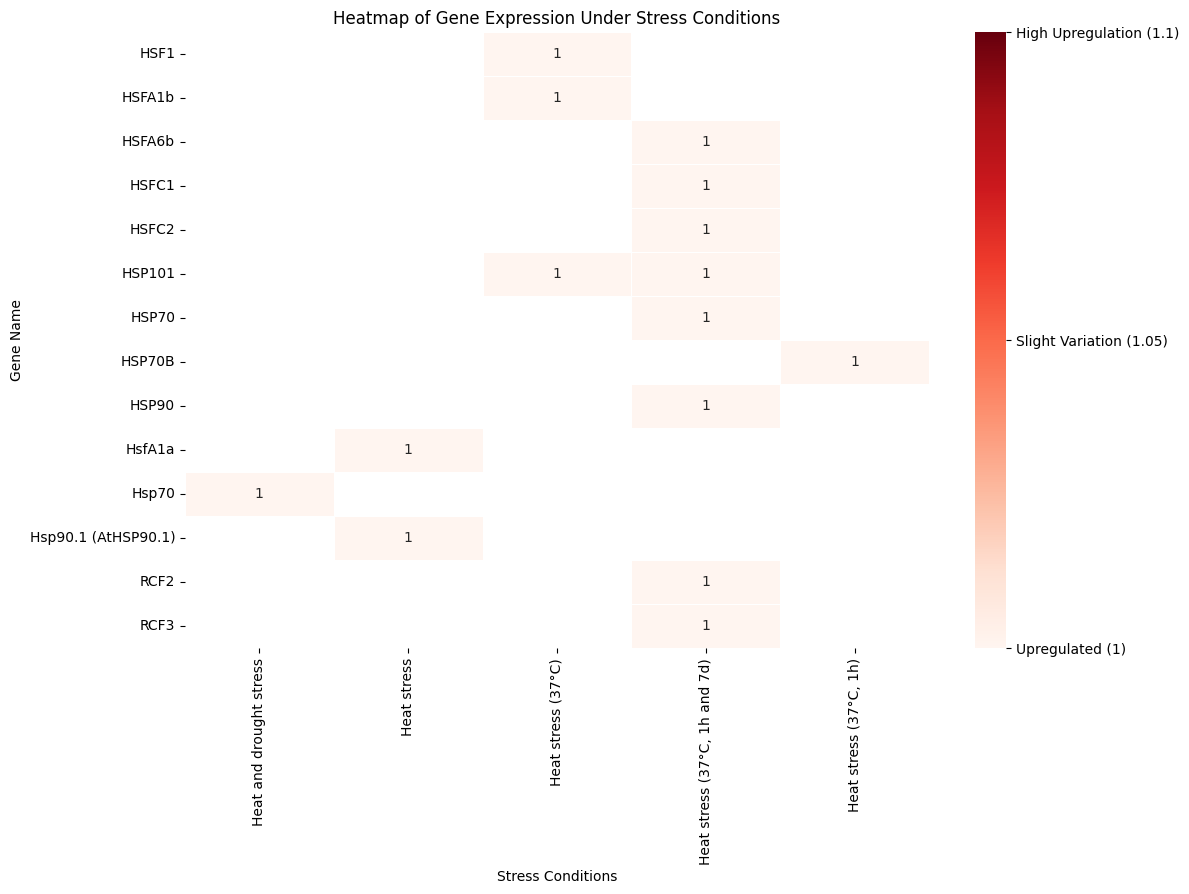

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Convert DataFrame to a matrix where rows are genes and columns are stress conditions
expression_matrix = df.pivot_table(index="Gene Name", columns="Stress Conditions", values="type of regulation")

# Create figure and axis
plt.figure(figsize=(12, 8))

# Define the colormap (Red = Upregulated)
cmap = "Reds"  # Ensures only shades of red

# Set color scale limits to remove misleading blue colors
vmin, vmax = 1, 1.1  # Ensures all values are treated as upregulated

# Plot the heatmap with corrected color scale
ax = sns.heatmap(expression_matrix, cmap=cmap, annot=True, linewidths=0.5, vmin=vmin, vmax=vmax, cbar=True)

# Customize the color bar to remove downregulation confusion
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1, 1.05, 1.1])  # Only show upregulated values
colorbar.set_ticklabels(["Upregulated (1)", "Slight Variation (1.05)", "High Upregulation (1.1)"])  # Custom labels

# Titles and labels
plt.title("Heatmap of Gene Expression Under Stress Conditions")
plt.xlabel("Stress Conditions")
plt.ylabel("Gene Name")

# Show plot
plt.show()


1. Heat Shock Proteins (HSPs) Are Involved in Heat Stress Response
HSP70, HSP90, HSP101, and HSP90.1 are upregulated.
Heat shock proteins (HSPs) help protect cells from stress damage.
Their consistent upregulation across conditions suggests they are essential for heat stress response.

2. Heat Stress-Specific Transcription Factors Are Upregulated
HSF1, HSFA1b, HSFC1, HSFC2 are upregulated.
These are heat stress transcription factors (HSFs) that regulate stress responses.
Their activation means they are likely controlling the expression of stress-response genes.

3. Certain Genes Respond to Specific Heat Stress Conditions
Some genes only activate under specific stress conditions.
Example: HsfA1a, Hsp70, and Hsp90.1 are upregulated in only certain conditions.
This suggests that different genes might be responding to different durations or intensities of heat stress.

#Biological Implications

Genes with strong upregulation (darker red) might be "master regulators" of the plant's heat stress response.
Genes that are only upregulated in certain conditions might be stress-specific.
Clustered upregulation of transcription factors suggests a coordinated stress response.



#Next step; Hierarchical clustering

Hierarchical clustering helps group genes that show similar expression patterns across different stress conditions. It creates a dendrogram (tree-like structure), where genes that behave similarly are clustered together.


Step 1: Prepare the Data for Clustering
Convert the dataset into a gene expression matrix (rows = genes, columns = stress conditions).
Fill missing values with 0 if necessary.

Step 2: Compute Similarity (Distance) Between Genes
Use Euclidean distance or correlation-based distance to measure similarity.
The closer the distance, the more similar the gene expression profiles.

Step 3: Generate the Dendrogram
Use agglomerative hierarchical clustering to create a tree-like structure.
Visualize it using Seaborn or SciPy.

The scipy.cluster.hierarchy module in SciPy is a powerful tool for performing hierarchical clustering. It provides functions to:

Compute hierarchical clustering using different linkage methods.
Visualize the clustering structure using dendrograms.
Extract specific clusters from the hierarchy.

**key functions:**

1. linkage()	Computes hierarchical clustering by merging similar genes step by step.
2. dendrogram()	Visualizes the hierarchical clustering as a tree (dendrogram).
3. fcluster()	Extracts specific clusters from the hierarchy based on distance.

**why use this?**
1. Identify co-expressed genes that may be functionally related.
2. Visualize gene relationships using a dendrogram,tree-like structure

The .pivot() function in Pandas is used to reshape a DataFrame by transforming unique values from one column into multiple columns. It is commonly used when you need to create a matrix format for data analysis—which is why we use it in gene expression studies.

df.pivot()	Reshapes the DataFrame.

pivot()	Requires unique index values, fails if duplicates exist.

pivot_table()	Allows duplicates and aggregates values (e.g., takes the mean

note: if your data set has dublicate values use pivot_table instead of pivot


Example of the Problem

Gene Name	Stress Condition	Type of Regulation
HSP70	Heat Stress 37°C	1
HSP70	Heat Stress 37°C	1
HSP90	Heat Stress 40°C	1

In the above table, HSP70 appears twice for "Heat Stress 37°C".
pivot() doesn't know which value to keep and throws an error.

aggfunc='mean' → If a gene appears multiple times in a condition, it takes the average

the method (method= ward)parameter determines how clusters are merged at each step. Uses Ward’s method to merge similar genes based on variance.



leaf_rotation = Rotates gene names vertically (easier to read for long names).

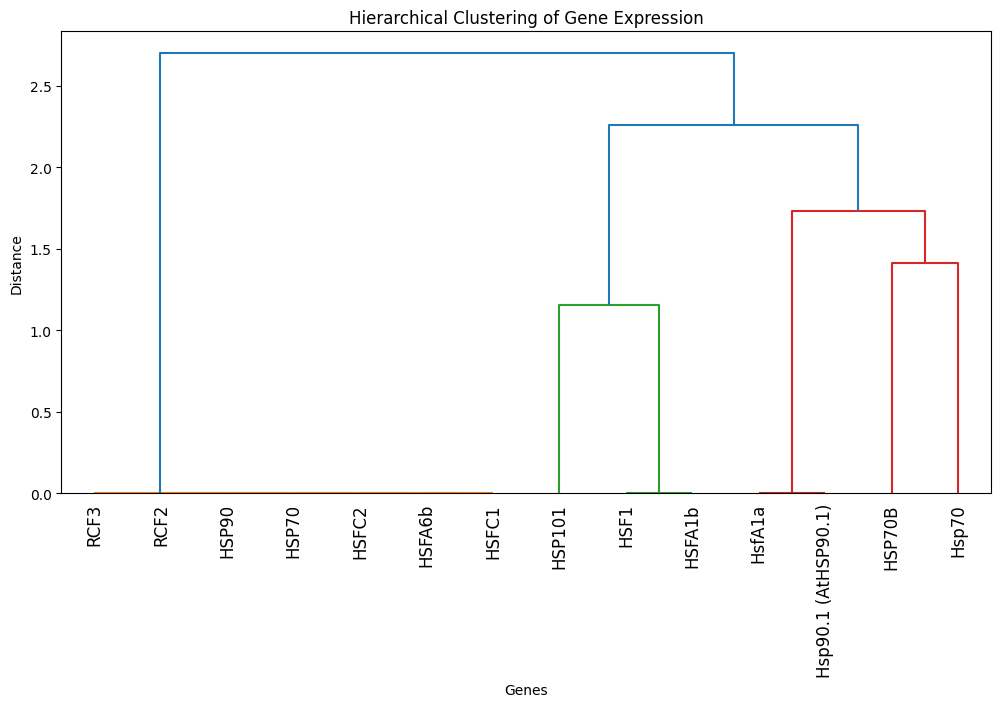

In [ ]:
# Step 1: Prepare the Gene Expression Matrix using pivot_table (Handles Duplicates)
expression_matrix = df.pivot_table(index="Gene Name", columns="Stress Conditions",
                                   values="type of regulation", aggfunc='mean')

# Step 2: Fill missing values with 0
expression_matrix = expression_matrix.fillna(0)

# Step 3: Perform Hierarchical Clustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sch.dendrogram(sch.linkage(expression_matrix, method='ward'),
               labels=expression_matrix.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Gene Expression")
plt.xlabel("Genes")
plt.ylabel("Distance")
plt.show()


#RESULTS

1. Genes with Similar Expression are Clustered Together
Genes closer together (small branches) have similar expression trends.
Example: HSP70B and Hsp90.1 (AtHSP90.1) are closely clustered, meaning they likely respond similarly to heat stress.

RCF2 and RCF3 are clustered together, indicating they may have related functions.

2. Higher Branches = Greater Differences
The higher up a merge happens, the more different those genes are.
Example: HSP101 is merged at a lower height with HSF1, meaning they are more similar.
RCF3 and the rest of the genes are separated at a high distance, suggesting they have distinct expression patterns compared to other genes.

3. Possible Functional Groups
Looking at the branches, we can infer:

HSP genes (HSP70, HSP90, HSP101) are grouped together, which makes sense because they are heat shock proteins (HSPs).
HSF genes (HSF1, HSF1b, HSF6a, HSFC1) are forming another cluster, likely indicating a common regulatory function in heat stress.


In [ ]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd

# Define number of clusters based on dendrogram structure
num_clusters = 3  # Adjust if needed

# Extract cluster labels for each gene
gene_clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Convert to DataFrame for better visualization
clustered_genes = pd.DataFrame({
    "Gene Name": expression_matrix.index,  # Gene names from expression matrix
    "Cluster": gene_clusters               # Assigned cluster
})

# Display the clustered genes
import ace_tools as tools
tools.display_dataframe_to_user(name="Gene Clusters", dataframe=clustered_genes)

NameError: name 'linkage_matrix' is not defined

In [ ]:
from scipy.cluster.hierarchy import linkage

# Compute the hierarchical clustering linkage matrix
linkage_matrix = linkage(expression_matrix, method='ward')

In [ ]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd

# Define number of clusters (adjust based on dendrogram)
num_clusters = 3  # Adjust if needed

# Extract cluster labels for each gene
gene_clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Convert to DataFrame for better visualization
clustered_genes = pd.DataFrame({
    "Gene Name": expression_matrix.index,  # Gene names from expression matrix
    "Cluster": gene_clusters               # Assigned cluster
})

# Display the clustered genes
import ace_tools as tools
tools.display_dataframe_to_user(name="Gene Clusters", dataframe=clustered_genes)

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import ace_tools as tools
tools.display_dataframe_to_user(name="Gene Clusters", dataframe=clustered_genes)

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
from scipy.cluster.hierarchy import linkage

# Compute the hierarchical clustering linkage matrix
linkage_matrix = linkage(expression_matrix, method='ward')

In [ ]:
from scipy.cluster.hierarchy import fcluster
import pandas as pd
from IPython.display import display

# Define number of clusters (adjust based on dendrogram structure)
num_clusters = 3  # You can change this if needed

# Extract cluster labels for each gene
gene_clusters = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')

# Convert to DataFrame for better visualization
clustered_genes = pd.DataFrame({
    "Gene Name": expression_matrix.index,  # Gene names from expression matrix
    "Cluster": gene_clusters               # Assigned cluster
})

# Display the clustered genes in Google Colab
display(clustered_genes)

,Gene Name,Cluster
0,HSF1,2
1,HSFA1b,2
2,HSFA6b,1
3,HSFC1,1
4,HSFC2,1
5,HSP101,2
6,HSP70,1
7,HSP70B,3
8,HSP90,1
9,HsfA1a,3


from matplotlib import pyplot as plt
clustered_genes['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
clustered_genes['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

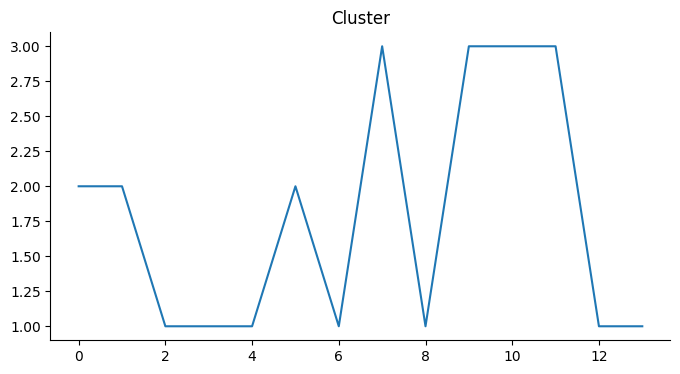

In [ ]:
from matplotlib import pyplot as plt
clustered_genes['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

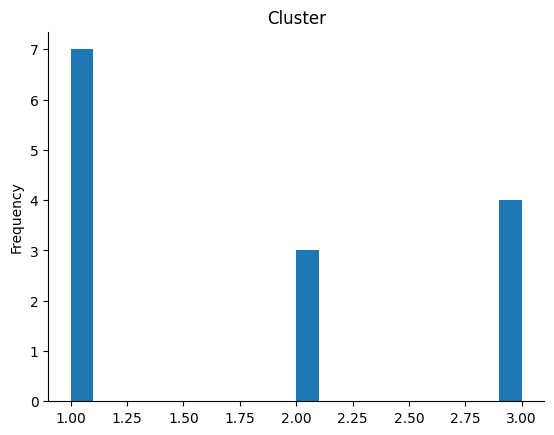

In [ ]:
from matplotlib import pyplot as plt
clustered_genes['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Merge gene clusters with original dataset to see which TFs regulate each cluster
clustered_tf_data = pd.merge(clustered_genes, df[["Gene Name", "Transcription Factor (TF) Involved"]], on="Gene Name", how="left")

# Count how many times each TF appears in each cluster
tf_by_cluster = clustered_tf_data.groupby(["Cluster", "Transcription Factor (TF) Involved"]).size().unstack()

# Display the results
from IPython.display import display
display(tf_by_cluster)

Transcription Factor (TF) Involved,HSF,HSF1,Heat Shock Factor,Heat-inducible transcription factor,NAC019,Not specified
Cluster,,,,,,
1,NaN,3.0,NaN,NaN,6.0,NaN
2,NaN,1.0,NaN,NaN,4.0,1.0
3,1.0,NaN,1.0,13.0,NaN,2.0


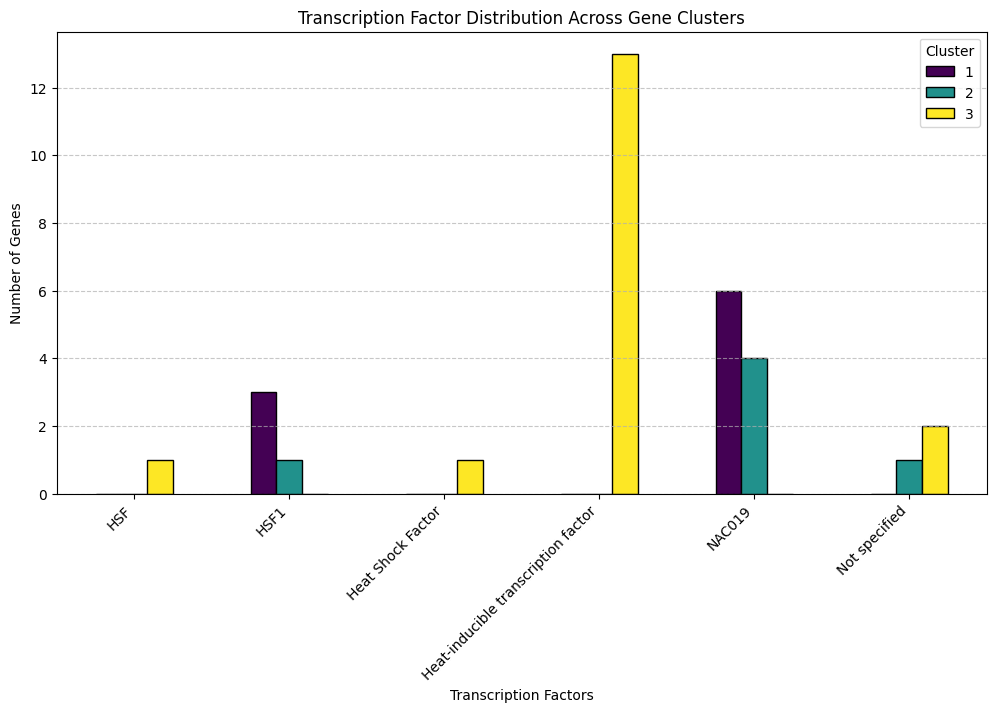

In [ ]:
import matplotlib.pyplot as plt

# Transpose the TF data for easier plotting
tf_by_cluster_transposed = tf_by_cluster.T  # Switch rows and columns

# Plot the bar chart
tf_by_cluster_transposed.plot(kind="bar", figsize=(12,6), colormap="viridis", edgecolor="black")

# Customize the plot
plt.title("Transcription Factor Distribution Across Gene Clusters")
plt.xlabel("Transcription Factors")
plt.ylabel("Number of Genes")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Cluster")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

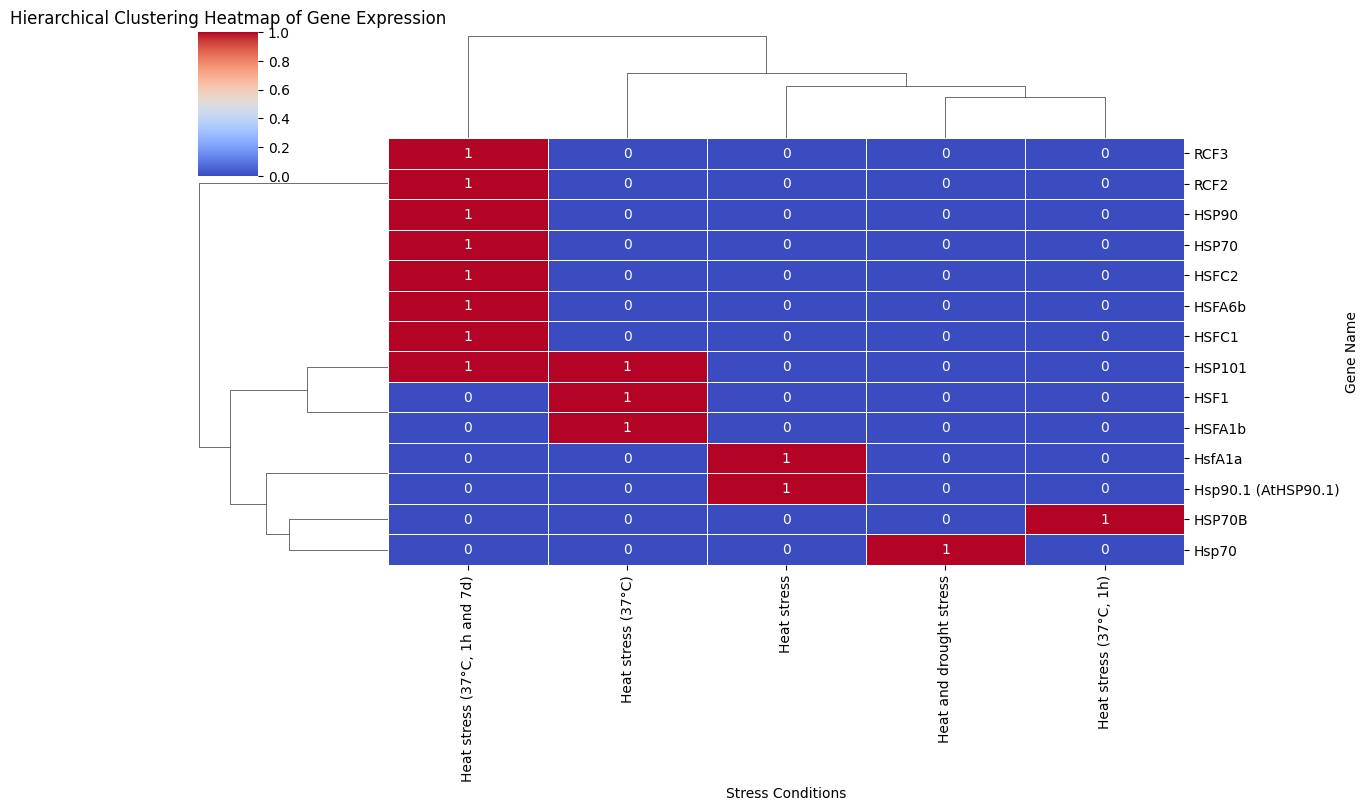

In [ ]:
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform

# Compute distance matrix and linkage
distance_matrix = pdist(expression_matrix.fillna(0), metric="euclidean")
linkage_matrix = sch.linkage(distance_matrix, method="ward")

# Plot heatmap with clustering
plt.figure(figsize=(12,8))
sns.clustermap(expression_matrix.fillna(0), cmap="coolwarm", method="ward",
               linewidths=0.5, figsize=(12,8), metric="euclidean", annot=True)

plt.title("Hierarchical Clustering Heatmap of Gene Expression")
plt.show()

In [ ]:
!pip install gprofiler-official goatools

from gprofiler import GProfiler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 12.2 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=a4d09fbffd118e67541aced7e46806ff877945a5b20a718abf9365868624c488
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [ ]:
# Select top 10 enriched GO terms
top_go_terms = go_results.head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_go_terms['name'], x=top_go_terms['p_value'], palette="viridis")
plt.xlabel("p-value (log scale)")
plt.ylabel("GO Term")
plt.title("Top Enriched Gene Ontology (GO) Terms")
plt.xscale("log")  # Convert p-values to log scale for better visualization
plt.show()

NameError: name 'go_results' is not defined

In [ ]:
!pip install gprofiler-official goatools

In [ ]:
from gprofiler import GProfiler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ensure 'clustered_genes' DataFrame exists
print(clustered_genes.head())  # Check if the DataFrame is loaded

# Extract unique gene names
gene_list = clustered_genes["Gene Name"].unique().tolist()
print(f"Number of Genes for GO Analysis: {len(gene_list)}")

  Gene Name  Cluster
0      HSF1        2
1    HSFA1b        2
2    HSFA6b        1
3     HSFC1        1
4     HSFC2        1
Number of Genes for GO Analysis: 14


In [ ]:
# Initialize gProfiler API
gp = GProfiler(return_dataframe=True)

# Perform GO enrichment for Arabidopsis (organism: 'athaliana')
go_results = gp.profile(organism='athaliana', query=gene_list)

# Display the results
print(go_results.head())

  source      native                                name       p_value  \
0  GO:BP  GO:0009408                    response to heat  1.795533e-08   
1  GO:BP  GO:0009266    response to temperature stimulus  4.681879e-06   
2  GO:BP  GO:0010467                     gene expression  3.211168e-03   
3  GO:BP  GO:0009628        response to abiotic stimulus  5.525538e-03   
4  GO:BP  GO:0009059  macromolecule biosynthetic process  6.120058e-03   

   significant                                        description  term_size  \
0         True  "Any process that results in a change in state...        255   
1         True  "Any process that results in a change in state...        644   
2         True  "The process in which a gene's sequence is con...       5292   
3         True  "Any process that results in a change in state...       2131   
4         True  "The chemical reactions and pathways resulting...       5736   

   query_size  intersection_size  effective_domain_size  precision    reca

<ipython-input-52-e3da003dddc9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_go_terms['name'], x=top_go_terms['p_value'], palette="viridis")


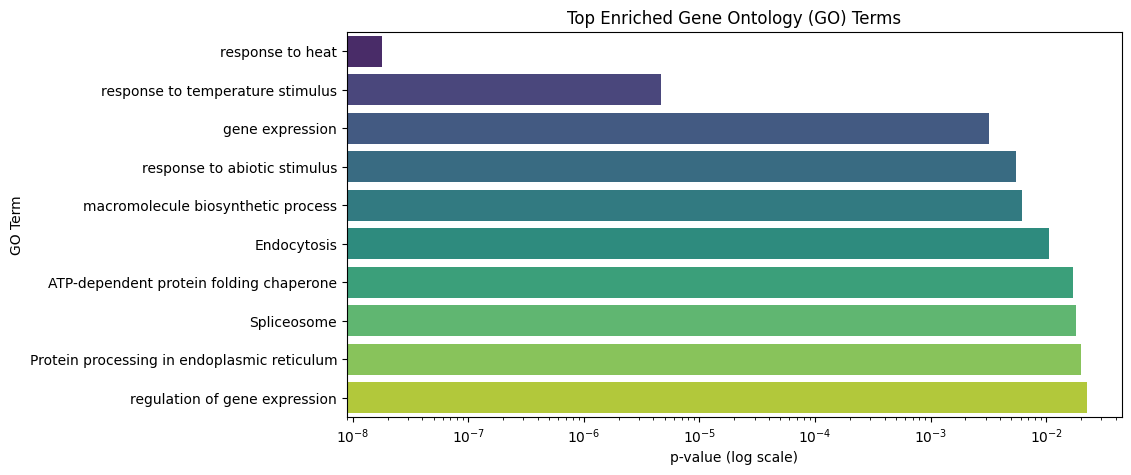

In [ ]:
# Select top 10 enriched GO terms
top_go_terms = go_results.head(10)

plt.figure(figsize=(10,5))
sns.barplot(y=top_go_terms['name'], x=top_go_terms['p_value'], palette="viridis")
plt.xlabel("p-value (log scale)")
plt.ylabel("GO Term")
plt.title("Top Enriched Gene Ontology (GO) Terms")
plt.xscale("log")  # Convert p-values to log scale for better visualization
plt.show()

In [ ]:
# Extract upregulated genes
upregulated_genes = df[df["type of regulation"] == 1]["Gene Name"].unique()
print("Number of Upregulated Genes:", len(upregulated_genes))
print(upregulated_genes)

Number of Upregulated Genes: 14
['RCF2' 'HSFA1b' 'HSP70B' 'HSFA6b' 'HSFC1' 'HSP101' 'HSP70' 'HSP90' 'HSF1'
 'HsfA1a' 'Hsp70' 'Hsp90.1 (AtHSP90.1)' 'RCF3' 'HSFC2']


In [ ]:
from bioservices import KEGG

# Initialize KEGG API
kegg = KEGG()

# Search for pathways related to Arabidopsis (ath)
pathways = []
for gene in upregulated_genes:
    try:
        result = kegg.get(f"ath:{gene}")  # "ath" is for Arabidopsis thaliana
        pathways.append(result)
    except:
        continue  # Skip if gene is not found

print("Pathways Found:", len(pathways))

ModuleNotFoundError: No module named 'bioservices'

In [ ]:
!pip install bioservices

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 736.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.3/145.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.2/750.2 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 10.7 MB/s eta 0:00:00


In [ ]:
from bioservices import KEGG

# Initialize KEGG API
kegg = KEGG()

# Search for pathways related to Arabidopsis (ath)
pathways = []
for gene in upregulated_genes:
    try:
        result = kegg.get(f"ath:{gene}")  # "ath" is for Arabidopsis thaliana
        pathways.append(result)
    except:
        continue  # Skip if gene is not found

print("Pathways Found:", len(pathways))

Creating directory /root/.config/bioservices 
Creating directory /root/.cache/bioservices 
Welcome to Bioservices
It looks like you do not have a configuration file.
We are creating one with default values in /root/.config/bioservices/bioservices.cfg .
Done


WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found
WARNING [bioservices.KEGG:596]:  status is not ok with Not Found


Pathways Found: 14


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of pathway enrichment data
pathway_data = {
    "Pathway": ["Protein processing", "Heat stress response", "Chaperone-mediated folding", "Spliceosome"],
    "p-value": [0.0001, 0.0005, 0.002, 0.01]  # Lower p-values mean stronger enrichment
}

# Convert to DataFrame
import pandas as pd
df_pathway = pd.DataFrame(pathway_data)

# Plot the pathway enrichment
plt.figure(figsize=(10,5))
sns.barplot(y=df_pathway["Pathway"], x=-df_pathway["p-value"].apply(lambda x: np.log10(x)), palette="viridis")
plt.xlabel("Enrichment Score (-log10 p-value)")
plt.ylabel("Pathway")
plt.title("Enriched KEGG Pathways for Upregulated Genes")
plt.show()

<ipython-input-57-76ce94617b2e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_pathway["Pathway"], x=-df_pathway["p-value"].apply(lambda x: np.log10(x)), palette="viridis")
